In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

pd.set_option('display.max_rows', 500)     # None means no limit

# Step 1:  check for duplicates, null values, formatting & data coherence 

In [2]:
df=pd.read_csv('netflix.csv')

########"# info about the data 

# df.info()
####### how many nulls/nans i have on each column
# print('\n===================check for nans===================\n')
# display(df.isna().sum())

# columns=df.columns

# print("\n===================Check for Duplicates===================\n")
# for col in columns:
#     print(f"{col} : {df[col].duplicated().sum()}")
 
####### how so the description has dupes, isn't each film on it's own description;

# description_dupes=df[df['description'].duplicated()] 
# display(description_dupes.sort_values(by='description'))
###### instead of one long string, we'll have lists saved in the column for more accurate data

df['listed_in']=df['listed_in'].str.strip().str.split(',')
df['country']=df['country'].str.strip().str.split(',')

########## check if i have type movies but duration has seasons in it or vice versa where i have tv-shows but the duration are in mins

# display(df[(df['type']=='TV Show') & (df['duration'].str.contains('min',case=False))])

# display(df[(df['type']=='Movie') & (df['duration'].str.contains('sea',case=False))])

# df['country'].explode().value_counts()
# display(df['type'].unique(),df['type'].value_counts())

# df.head(500)

# Step 2: data cleaning & preparation

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'],format='mixed',errors='coerce')
# display(df.isna().sum())
# display(df.info())

######## fix the duration values that exist in rating

idx_duration_null=df[(df['duration'].isna())&(df['rating'].str.contains('min',case=False))].index.values
if len(idx_duration_null):
    df.loc[idx_duration_null,'duration']=df.iloc[idx_duration_null]['rating']
    df.loc[idx_duration_null,'rating']=pd.NA
    df.iloc[idx_duration_null]



### fill nulls based on the column type
for col in df.columns:
    col_dtype=df[col].dtype
    if col_dtype == 'str':
        df[col]=df[col].fillna('unknown')
    if col_dtype =='object':
        if  col=='country':
            df[col]=df[col].fillna('Other')
        elif col=='listed_in':
            df[col]=df[col].fillna('miscellaneous')
    if 'date' in str(col_dtype):
        time_tofillna=time.gmtime(0)
        time_tofillna=datetime.datetime(*time_tofillna[:3]).date() # datetime64[us] is a pandas datatime, instead of inserting python datatime & giving us an error later on, we convert it to timestamp that pandas is familiar with.
        pd_time_tofillna=pd.Timestamp(time_tofillna)
        df[col]=df[col].fillna(pd_time_tofillna)


try:
    df.insert(df.shape[1],column="year_date_added",value=df['date_added'].dt.year)
    df.insert(df.shape[1],column="month_date_added",value=df['date_added'].dt.month)
    df.insert(df.shape[1],column="day_date_added",value=df['date_added'].dt.day)
    df.insert(df.shape[1],column="movie_duration",value=df['duration'][df["duration"].str.contains("min")])
except:
    pass


# Step 3: Viz

Text(0.5, 1.0, 'Ratings on Movies/TV-Shows')

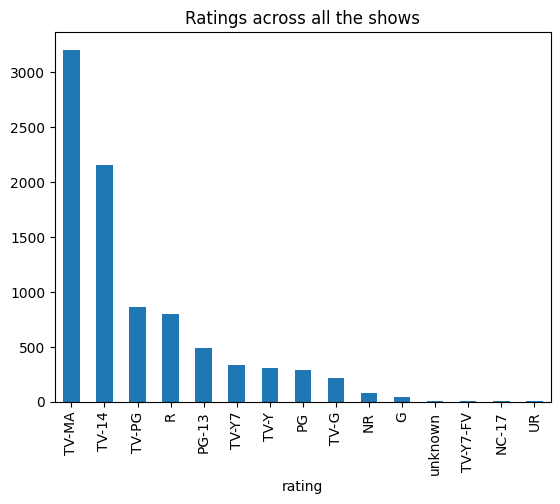

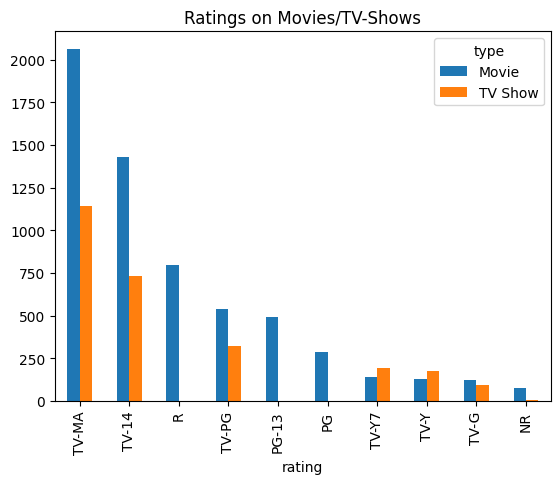

In [4]:
########## Distribution of ratings through our dataset of shows (either histogram or a pie chart)

rating_bar1=df['rating'].value_counts().plot.bar()
rating_bar1.set_title("Ratings across all the shows")

rating_counts=df.groupby(['rating','type']).size().unstack(fill_value=0)
rating_counts=rating_counts.sort_values(by='Movie',ascending=False).head(10)
rating_bar2=rating_counts.plot.bar()
rating_bar2.set_title("Ratings on Movies/TV-Shows")


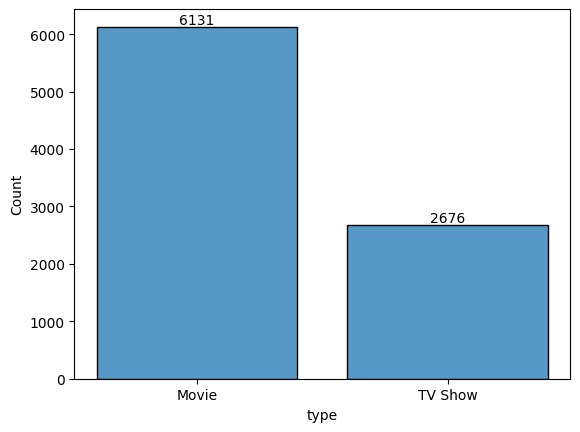

In [5]:
################### Movie vs Serie proportion

hist_plot=sns.histplot(df['type'],shrink=0.8)
for container in hist_plot.containers:
    plt.bar_label(container=container)

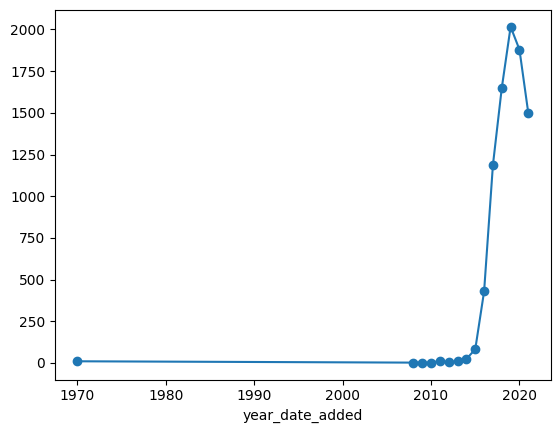

In [6]:
################  how much shows we add on each year

year_added=df.groupby('year_date_added').size()

year_added_chart=year_added.plot(kind='line',marker="o")


type              Movie  TV Show
year_date_added                 
1970                NaN     10.0
2008                1.0      1.0
2009                2.0      NaN
2010                1.0      NaN
2011               13.0      NaN
2012                3.0      NaN
2013                6.0      5.0
2014               19.0      5.0
2015               56.0     26.0
2016              253.0    176.0
2017              839.0    349.0
2018             1237.0    412.0
2019             1424.0    592.0
2020             1284.0    595.0
2021              993.0    505.0


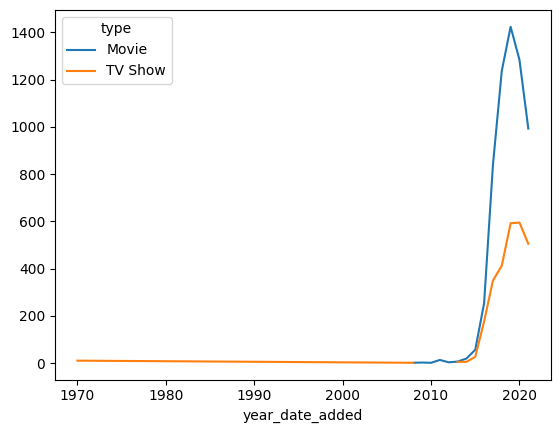

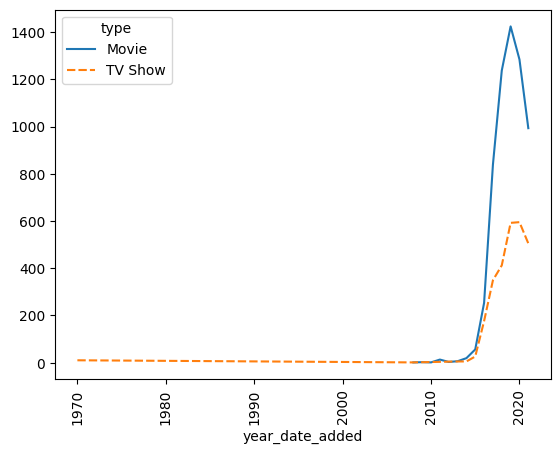

In [7]:
################# evolution of tv-shows & movies by year


movie_tv_show_grouping=df.groupby(['year_date_added','type']).size().unstack()
print(movie_tv_show_grouping)
movie_tv_show_grouping.plot(kind='line')


fig,ax=plt.subplots()
grph=sns.lineplot(data=movie_tv_show_grouping)
grph.tick_params('x',labelrotation=90)

<Axes: xlabel='year_date_added', ylabel='count'>

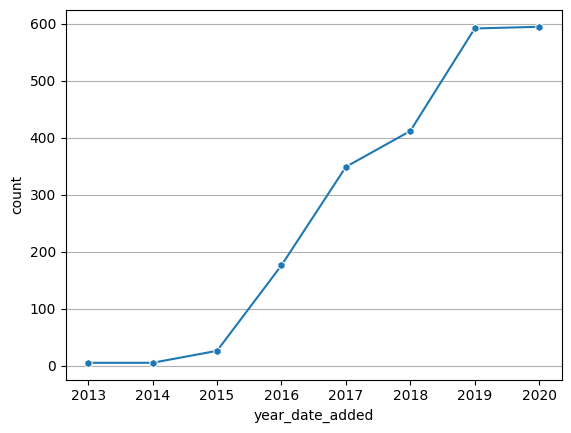

In [8]:
################# Number of series from 2011 to 2021
df_filtered=df[(df['year_date_added'] >2011) & (df['year_date_added']<2021)]
df_filtered=df_filtered[df_filtered['type'].str.contains('tv',case=False)]
tv_show_count=df_filtered['year_date_added'].value_counts()
plt.axes().grid(True,axis='y')
sns.lineplot(data=tv_show_count,marker='h')

## movies & tv shows

<Axes: xlabel='count', ylabel='country'>

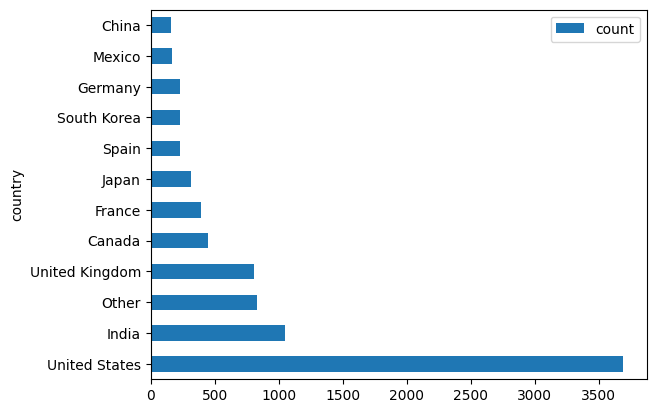

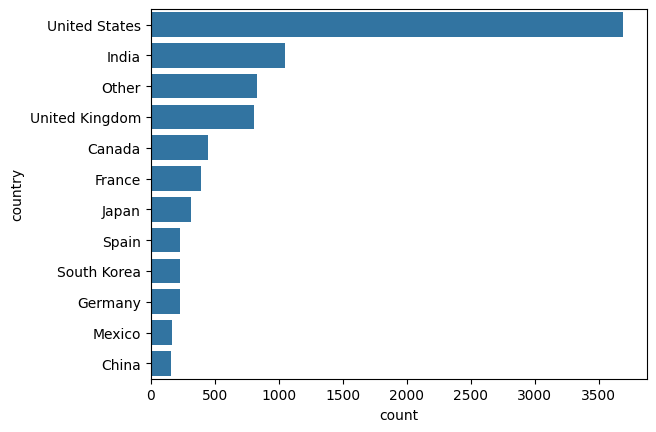

In [9]:

listed_in_df =df['listed_in'].explode().str.strip().value_counts()
country_df =df['country'].explode().str.strip().value_counts().reset_index().head(12)
########## matplotlib with pandas
country_df.plot.barh(x='country')

########## seaborn
fg,ax=plt.subplots()
sns.barplot(country_df,x='count',y='country')



In [ ]:
###### Question : Nombre de productions par pays et par classification d’âge.
###### franchement ma3rftch w mabghitch n fhm b AI ta nfhmha mzyan kfx khasni nkhdmha


# Step 4: Insights 

- Top genres that we have at netflix are (International movies & tv shows, Drama & comedies)
- The top 3 countries we have shows from are (USA, India & UK) :ps:: there's other but since it's unidentifiable it could be many other countries so it wasn't included in the list
- the type of content that we have most shows in is Movies by 6131 movie listed in our Platform


i would advise the direction to have more emphasis with tv-shows since that would generate a little bit more revenue with the length of tv-shows & how it would take an individual to watch them, also to not only focalize on USA but look for other countries to add their content in here.